### 이미지 데이터 전처리

MNIST 데이터 셋 : 이미지 데이터 전처리
- 이미지 데이터 확인
- 이미지 차원 변환
- 정규화 (Normalization)
- 원-핫 인코딩 (바이너리화)

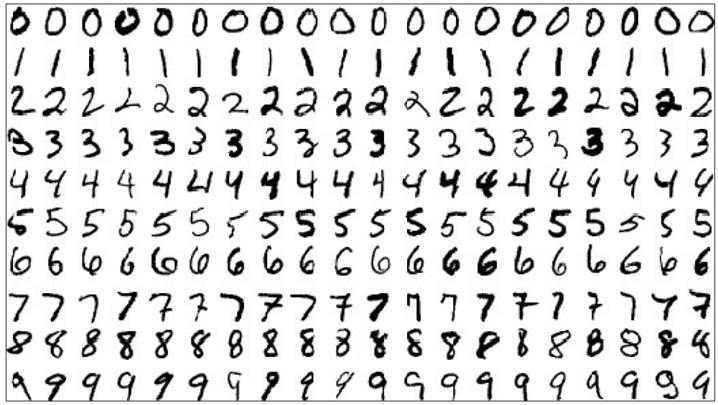

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

In [4]:
# !pip install tensorflow

In [35]:
# MNIST 데이터셋 로드 

from tensorflow.keras.datasets import mnist

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [36]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train.ndim

3

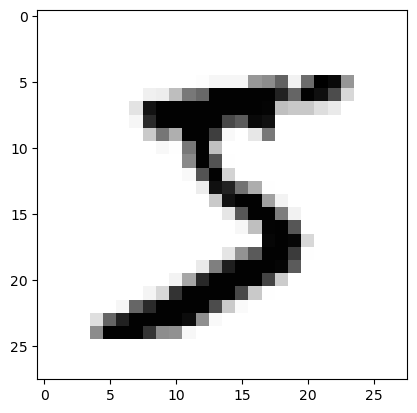

In [39]:
# 첫 번째 이미지 그래프로 출력
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap = 'Greys')

이미지 코드 확인
- 가로 28x28=784 픽셀
- 각 픽셀은 밝기 정도에 따라 0~255 등급
- 흰색 : 255, 글씨 : 0 ~ 254 숫자 중 하나로 채워져
- 긴 행렬로 이루어진 하나의 집합으로 변환됨

In [40]:
X_train[0] # 28 x 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
X_train[0].shape

(28, 28)

In [42]:
for x in X_train[0]:
    for i in x:
        print(i, end=' ')
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [43]:
for x in X_train[0]:
    for i in x:
        print('%4s' % str(i), end='')
    print()
    
## 화면 축소해서 볼것

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

이미지 차원 변환 : 2차원 배열을 1차원 배열로 변환
이미지는 다시 숫자의 집합으로 바뀌어 학습 데이터 셋으로 사용됨
- 가로28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변경
- reshape() 함수 사용

In [44]:
X_train = X_train.reshape(X_train.shape[0], 784) # 28 * 28 = 784
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
X_train.shape

(60000, 784)

In [46]:
X_train.ndim

2

In [47]:
X_train.shape[0]

60000

In [48]:
X_train.shape[1]

784

In [49]:
# X_train.shape[2] 오류남

정규화 (Normalization)
- 이미지의 픽셀값은 (RGB, 명도, 채도) 0~255, 256단계로 되어 있음
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 
- 현재 주어진 데이터의 값(이미지 픽셀값은)은 0부터 255까지의 정수
- 먼저 실수로 변환 후 255로 나눔
- 0과 1 사이의 값을 가지는 실수로 변환

In [50]:
# X_train 정규화
X_train = X_train.reshape(-1, 28*28).astype('float32')/255

In [51]:
# 정규화 결과 확인
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [52]:
# X_test 도 정규화
X_test = X_test.reshape(-1, 28*28).astype('float32')/255

In [53]:
# 정규화 확인
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
# 이 숫자가 실제 어떤 값인지 클래스 값 확인
print("class : %d " % (Y_train[0]))

class : 5 


In [55]:
# 원-핫 인코딩 : to_categorical() 함수 사용 : 바이너리화 
# 다중분류시 활용할수도 있음, 단 함수 내부에서 진행하는 활성화 함수도 있음
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [56]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [57]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)